In [1]:
#Download HSI Data
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2023-04-20 16:28:12--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat [following]
--2023-04-20 16:28:12--  https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat          100%[===================>]  33.19M  2.40MB/s    in 23s     

2023-04-20 16:28:36 (1.44 MB/s) - ‘PaviaU.mat’ saved [34806917/34806917]

URL transformed to HTTPS due to an HSTS policy
--2023-04-20 16:28:36--  https://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Reusing existing connection to www.ehu.eus:443.
HTTP request sent, awaiting response... 200 OK
Length: 11005 (11K)
S

In [8]:
!ls

PaviaU.mat  PaviaU_gt.mat  __notebook_source__.ipynb


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np  

In [4]:
from scipy.io import loadmat
def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y
X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


In [5]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [6]:
df = extract_pixels(X,y)
df.head()

100%|██████████| 103/103 [00:00<00:00, 146.35it/s]


,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-95,band-96,band-97,band-98,band-99,band-100,band-101,band-102,band-103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [9]:
df.to_csv('X.csv', index=False)

In [10]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (207400, 104)


Enter the band Number(1-103) : 103


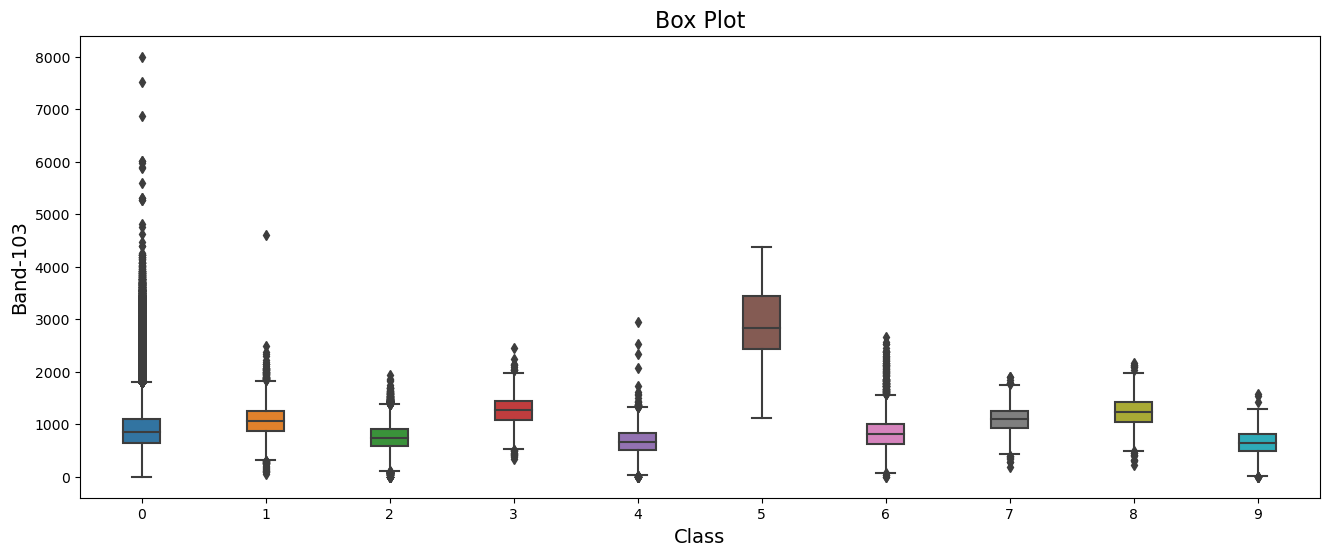

In [7]:
import seaborn as sns
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-103) :'))
sns.boxplot( x=df["class"], y=df["band-1"], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
from sklearn.decomposition import PCA
kpca = PCA(n_components=50, whiten=True) 
principalComponents = kpca.fit_transform(X)
principalComponents.shape

(207400, 50)

In [10]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.20, random_state = 11)

In [11]:
X_train.shape, X_test.shape

((165920, 50), (41480, 50))

In [ ]:
svm = SVC(degree = 50, kernel ='rbf',gamma='scale', cache_size = 10*1024)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,y_pred)
print("SVM accuracy:",acc)

SVM accuracy: 0.834450337512054


In [ ]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test,y_pred,zero_division=0))

Classification report:

               precision    recall  f1-score   support



           0       0.85      0.97      0.90     32925

           1       0.00      0.00      0.00      1326

           2       0.71      0.61      0.65      3730

           3       0.86      0.01      0.03       420

           4       0.75      0.10      0.18       613

           5       0.82      0.91      0.86       269

           6       1.00      0.00      0.01      1006

           7       0.67      0.62      0.64       266

           8       0.67      0.01      0.03       736

           9       0.00      0.00      0.00       189



    accuracy                           0.83     41480

   macro avg       0.63      0.32      0.33     41480

weighted avg       0.80      0.83      0.79     41480




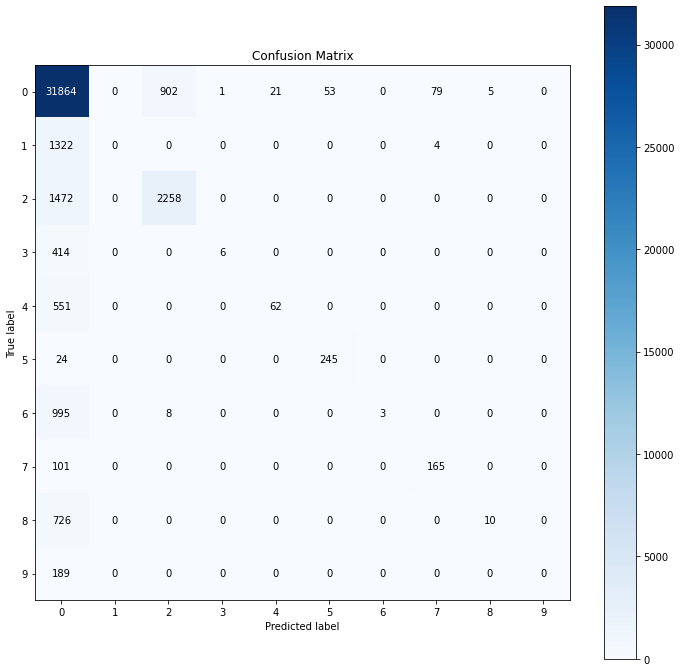

In [ ]:
from sklearn.metrics import confusion_matrix
! pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12));

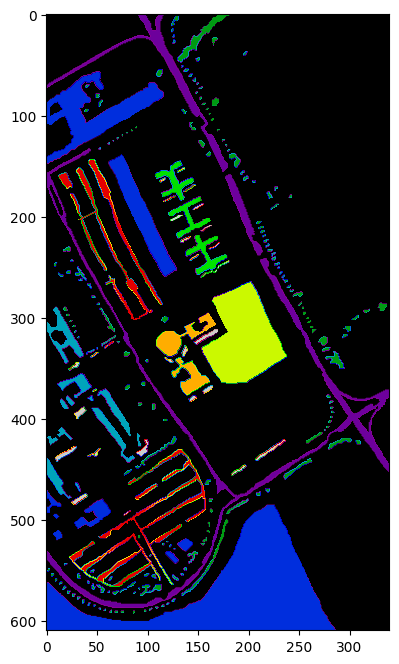

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(df.iloc[:, -1].values.reshape((610, 340)),cmap='nipy_spectral')
plt.show()

In [14]:
# !pip install tqdm
from tqdm import tqdm
pre = y_pred
clmap = [0]*X.shape[0]
for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]
for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 165920/165920 [00:00<00:00, 1082358.95it/s]

100%|██████████| 41480/41480 [00:00<00:00, 1199256.44it/s]


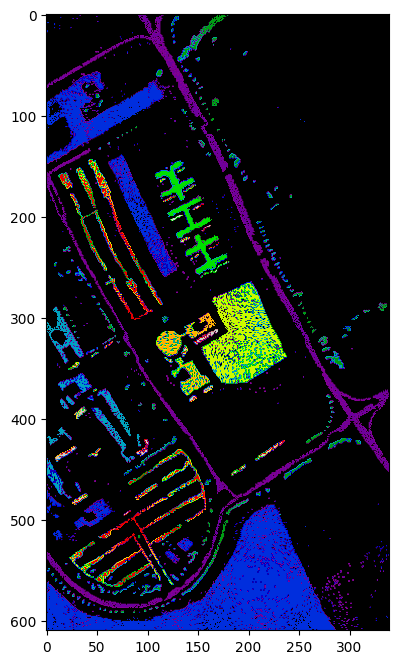

In [16]:
plt.figure(figsize=(10, 8))
plt.imshow(np.array(clmap).reshape((610, 340)),cmap='nipy_spectral')
plt.show() 